# QCTO - Workplace Module

### Project Title: Vegetable Prices Data Analysis
#### Done By: Ntokozo Hadebe
Github link: https://github.com/Ntokozo-sbusiso/QCTO_Workplace.git

Trello board link: https://trello.com/b/0nYQqZtZ/vegetablepricesdataanalysis

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.

The agricultural sector in India is vital to its economy, with vegetables holding particular significance due to their essential role in diets and economic livelihoods.

Understanding the fluctuations in vegetable prices is crucial for farmers, consumers, and policymakers alike, as these prices directly impact income, household budgets, and food security. Fluctuations in vegetable prices can also have broader implications on inflation rates and macroeconomic stability.

Through this project, we aim to explore the patterns behind vegetable price fluctuations, providing insights that can inform policies aimed at promoting agricultural sustainability, ensuring food affordability, and enhancing economic welfare across India

* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.

#### The analysis aims to address several key research questions pertaining to vegetable price dynamics:

- Identify patterns of seasonal variation in vegetable prices.
- Examine how seasonal trends affect pricing trends for different vegetable types.
- Identify trends and patterns in vegetable prices over time through exploratory data analysis.
- Explore seasonal variations in vegetable prices to understand their cyclical nature.
- Provide actionable insights for stakeholders in the agricultural industry to support decision-making processes, enhance market efficiency, and improve economic outcomes.

By addressing these research questions, the study aims to provide valuable insights into the determinants of vegetable prices and potential strategies to improve price stability in agricultural markets.



---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
#Please use code cells to code in and do not forget to comment your code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---


### Dataset overview
- The dataset used for this analysis was sourced from Kaggle on May 7, 2024. It originated from an authorized source, the Agricultural Marketing Information Network (AGMARKNET), available at https://agmarknet.gov.in/.

- It offers a comprehensive overview of vegetable prices across various regio and regions in Indians, making it a valuable resource for researchers, analysts, and enthusiasts interested in studying pricing dynamics. The dataset contains information on a diverse array of vegetables, providing detailed price records over time.

- Attributes included in the dataset comprise vegetable types, price data, and time periods covered, allowing for a thorough exploration of pricing trends and patterns. Prior to analysis, data cleaning and preprocessing steps were undertaken to ensure data quality and integrity. These steps can be observed in the Data Cleaning section below.

#### Datatypes:

- Price Dates is of 'object' datatype.
- The vegetable price datatypes is in numerical type.
- There are inconsistencies in the vegetable price datatypes, with some vegetables being of 'integer' datatype, whilst - - others are of 'float' datatype.


- The dataset consists of 287 observations (rows) and 11 features (columns)


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

The data used for this project is located in the prices.csv file. This file is loaded into a Pandas DataFrame (called df) using the pd.read_csv() function. This function reads the CSV file and converts it into a DataFrame for further manipulation and analysis

In [2]:
# loading the dataset
df = pd.read_csv('prices.csv')

# making the copy of dataset 
df_copy = df.copy()

# displaying the firt few rows of the Dataframe
df_copy.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

#### Renaming Columns

- The rename_columns function serves to standardize column names in a DataFrame according to PEP 8 principles, ensuring consistency and readability within the dataset and simplifying downstream data analysis and visualisation tasks. The function defines a dictionary called 'renamed_columns' that maps each column by name to its standardised name - with all lowercase and spaces replaced by underscores. It then renames each column in the DataFrame by making use of the .rename() method in combination with the 'rename_columns' dictionary.


In [3]:
def rename_columns(df):
    """
    Rename columns of a DataFrame according to PEP 8 principles, by converting column names to lowercase and replacing spaces or
        special characters with underscores..

    Args:
        df (pandas.DataFrame): Input DataFrame with columns to be renamed.

    Returns:
        pandas.DataFrame: DataFrame with columns renamed according to PEP 8.
    """
    # dictionary mapping column names to standardised names
    renamed_columns = {
        'Price Dates': 'price_dates',
        'Bhindi (Ladies finger)': 'bhindi',
        'Tomato': 'tomato',
        'Onion': 'onion',
        'Potato': 'potato',
        'Brinjal': 'brinjal',
        'Garlic': 'garlic',
        'Peas': 'peas',
        'Methi': 'methi',
        'Green Chilli': 'green_chilli',
        'Elephant Yam (Suran)': 'elephant_yam'
    }
    return df.rename(columns=renamed_columns)

# Rename columns
df_copy = rename_columns(df_copy)

#### Converting Data Types

- The convert_data_types function transforms the data types of specific columns in the DataFrame for consistency and accuracy:

1. It converts integer columns (representing vegetable prices) to floats using .astype(float) to ensure compatibility and facilitate numerical operations.
2. It converts the 'price_dates' column to datetime using .to_datetime() with format='%d-%m-%Y' for accurate time-based analysis.

This improves data integrity and reduces errors in further analysis.

In [4]:
def convert_data_types(df):
    """
    Convert data types of columns within a DataFrame.

    This function converts integer columns to float. 
    Additionally, it standardizes the format of the 'price_dates' column to datetime objects with the format "%d-%m-%Y".

    Args:
        df (pandas.DataFrame): Input DataFrame with columns to be converted.

    Returns:
        pandas.DataFrame: DataFrame with data types converted as specified.
    """
    # Convert integer columns to float
    int_columns = df.select_dtypes(include='int64').columns
    df[int_columns] = df[int_columns].astype(float)
    
    # Convert 'price_dates' column to datetime with correct format
    df['price_dates'] = pd.to_datetime(df['price_dates'], format='%d-%m-%Y')
    
    return df

# Convert data types
df_copy = convert_data_types(df_copy)

#### Checking for Missing Values

The check_missing_values function serves as a utility to quickly identify and report any null values present in each column of a DataFrame. By iterating through each column and using the .isnull() and .sum() methods, it calculates the count of null values in each column. The function then prints out the count of null values alongside the corresponding column name, providing a clear overview of the null value distribution within the DataFrame.


In [5]:

#Handle missing values
def check_missing_values(df):
    """check for null values in each column of a Dataframe and print the count of null values, 
    along with column-specific null parameters
    """
    print(f'Null values count for each column: ')
    print('---------------------------------------------')

    for col in df.columns:
        null_count = df_copy[col].isnull().sum()
        print(f'{col}: {null_count}')

check_missing_values(df_copy)

Null values count for each column: 
---------------------------------------------
price_dates: 0
bhindi: 0
tomato: 0
onion: 0
potato: 0
brinjal: 0
garlic: 0
peas: 0
methi: 0
green_chilli: 0
elephant_yam: 0


#### Result:

 This result confirms that there are no missing values identified in the DataFrame.

#### Check for Duplicate Rows

- The count_dupl_rows function identifies and counts duplicate rows in the dataset using .duplicated().sum(). It helps ensure data quality by detecting and guiding the removal of redundant rows, improving the accuracy of analysis.

In [6]:
# Count the number of duplicate rows in a pandas DataFrame.
def count_dupl_rows(df):
    duplicates = df.duplicated().sum()
    return duplicates

print(f'Number of duplicate rows {count_dupl_rows(df_copy)}')

Number of duplicate rows 0


#### Check for Duplicate Date

- We also need to check for duplicate dates in the 'price_dates' column to make sure there’s only one price for each date.
- The count_duplicate_dates function will count how many duplicate dates exist in this column, helping to ensure accurate time-based analysis.

In [7]:
def count_duplicate_dates(df):
    duplicates = df.duplicated(subset=['price_dates']).sum()
    return duplicates
print(f'The number of duplicate dates: {count_duplicate_dates(df_copy)}')

The number of duplicate dates: 0


#### Identifying Potential Outliers

- The check_outliers function identifies outliers in vegetable prices using descriptive statistics. It calculates the mean, median, standard deviation, and interquartile range (IQR) for each float column in the DataFrame. Values outside the IQR range are flagged as potential outliers. The function returns a DataFrame showing the outliers, their count, and relevant statistics like mean and standard deviation for comparison.

In [8]:
# Identify potential outliers in float columns of a DataFrame using descriptive statistics
def check_outliers(df):
    
    outliers = []
    for col in df.select_dtypes(include='float64').columns:
    # Calculate descriptive statistics for the current column
        desc_stats = df[col].describe()
        mean = desc_stats['mean']  # Mean value of the column
        std_dev = desc_stats['std']  # Standard deviation of the column
        q1 = desc_stats['25%']  # First quartile (25th percentile) of the column
        q3 = desc_stats['75%']  # Third quartile (75th percentile) of the column
        iqr = q3 - q1  # Interquartile range (IQR) of the column
        lower_bound = q1 - 1.5 * iqr  # Lower bound for potential outliers
        upper_bound = q3 + 1.5 * iqr  # Upper bound for potential outliers

        # Identify potential outliers in the current column
        potential_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()

        # Calculate the count of outliers
        outlier_count = len(potential_outliers)

        # Create a DataFrame to store the results
        results = pd.DataFrame({
            'Column': [col],
            'Count of Outliers': [outlier_count],
            'Mean': [mean],
            'Standard Deviation': [std_dev],
            'Potential Outliers': [potential_outliers]
        })
        
        # Append the results DataFrame to the list
        outliers.append(results)

    # Concatenate the results DataFrames into a single DataFrame
    outliers_df = pd.concat(outliers, ignore_index=True)
    return outliers_df

# Set the display options to show the entire content of the 'Potential Outliers' column
pd.set_option('display.max_colwidth', None)

# Identify potential outliers
outliers = check_outliers(df_copy)
outliers

,Column,Count of Outliers,Mean,Standard Deviation,Potential Outliers
0,bhindi,7,29.444251,8.124815,"[60.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0]"
1,tomato,1,16.006969,0.118056,[18.0]
2,onion,24,20.649826,11.711204,"[45.0, 57.0, 55.0, 54.0, 54.0, 50.0, 50.0, 47.0, 50.0, 50.0, 47.0, 45.0, 46.0, 46.0, 45.0, 45.0, 46.0, 50.0, 47.0, 46.0, 47.0, 48.0, 46.0, 48.0]"
3,potato,0,18.585366,2.726238,[]
4,brinjal,13,31.655052,11.725421,"[60.0, 70.0, 70.0, 60.0, 60.0, 70.0, 60.0, 70.0, 80.0, 70.0, 70.0, 80.0, 60.0]"
5,garlic,1,133.101045,60.078331,[290.0]
6,peas,5,66.658537,33.302415,"[150.0, 150.0, 150.0, 150.0, 150.0]"
7,methi,10,20.383275,117.428417,"[2000.0, 30.0, 30.0, 35.0, 35.0, 30.0, 30.0, 30.0, 30.0, 30.0]"
8,green_chilli,12,44.122404,12.796590,"[0.13, 80.0, 90.0, 80.0, 90.0, 80.0, 80.0, 75.0, 90.0, 80.0, 80.0, 80.0]"
9,elephant_yam,50,28.797909,6.607973,"[15.0, 15.0, 15.0, 40.0, 12.0, 40.0, 40.0, 40.0, 40.0, 15.0, 15.0, 15.0, 50.0, 15.0, 15.0, 12.0, 12.0, 40.0, 40.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 40.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]"


#### Results:

Most potential outliers are clustered around values above or below the mean, suggesting seasonality as a factor. To explore this, we'll extract the month from the 'price_date' column and group vegetable prices by month. A time series plot will visualize this trend in the Exploratory Data Analysis.

However, two extreme outliers likely indicate errors:

- 'Methi' has an outlier at 2000.0, much higher than the mean.
- 'Green Chilli' has an outlier at 0.13, much lower than the mean.

These extreme outliers will be replaced by the mean of the 15 preceding and 15 following observations to account for seasonality.

#### Replacing Erroneous Outliers



In [9]:
def replace_erroneous_outliers(df, column, outlier_values):
    """
    Replace outliers in a DataFrame column with the mean of the 30 surrounding observations.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the outliers.
    - column (str): The name of the column with outliers.
    - outlier_values (list): List of outlier values to replace.

    Returns:
    - pandas.DataFrame: The DataFrame with outliers replaced.
    
    Note: Assumes the DataFrame is sorted chronologically.
    """
    for outlier in outlier_values:
        outlier_index = df.index[df[column] == outlier].tolist()[0]
        lower_bound = max(outlier_index - 15, 0)
        upper_bound = min(outlier_index + 15, len(df) - 1)

        # Calculate the mean of the 30 surrounding values
        mean_surrounding = df.loc[lower_bound:upper_bound, column].mean()

        # Replace the outlier
        df.at[outlier_index, column] = mean_surrounding

    return df

# Replace the identified outliers:
df_copy = replace_erroneous_outliers(df_copy, 'methi', [2000.0])
df_copy = replace_erroneous_outliers(df_copy, 'green_chilli', [0.13])


#### Extracting Month to Explore Possible Seasonality

The extract_month function extracts the month from a datetime column in a DataFrame and stores it in a new column. This is useful for time-series analysis to identify seasonal trends. It uses dt.strftime('%m-%Y') to format the date and creates a new column, 'price_months', for easier grouping, visualization, and analysis based on monthly patterns.

In [10]:
#Extract month from a datetime column and create a new column to store the month values.

def extract_month(df, date_colummn):

    df['price_months'] = df[date_colummn].dt.strftime('%m-%Y')
        
    return df

    # Extract the month:
df_copy = extract_month(df_copy, 'price_dates')
df_copy.head()

,price_dates,bhindi,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam,price_months
0,2023-01-01,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0,01-2023
1,2023-01-02,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,01-2023
2,2023-01-03,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,01-2023
3,2023-01-04,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0,01-2023
4,2023-01-08,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0,01-2023


## Data Pre-Processing 

#### Data Normalization/Standardization:

- Normalizing or standardizing numeric columns to bring all features into the same scale, which can be especially useful for machine learning models.

In [11]:
def normalize_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Normalize numeric columns
numeric_columns = ['bhindi', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam']
df_copy = normalize_columns(df_copy, numeric_columns)

In [12]:
df_copy.head()

,price_dates,bhindi,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam,price_months
0,2023-01-01,0.684995,16.911535,0.115490,0.519802,-0.141397,-1.385628,-1.253101,-0.772110,0.059296,-0.57575,01-2023
1,2023-01-02,0.684995,-0.059131,0.115490,0.519802,-0.141397,-1.302258,-1.253101,-0.907725,-0.340374,-0.57575,01-2023
2,2023-01-03,0.684995,-0.059131,0.029953,0.519802,-0.141397,-1.302258,-1.253101,-0.907725,-0.340374,-0.57575,01-2023
3,2023-01-04,0.068521,-0.059131,0.029953,1.254696,-0.568566,-1.302258,-1.253101,-0.907725,-0.340374,-0.57575,01-2023
4,2023-01-08,0.684995,-0.059131,-0.055584,0.887249,-0.568566,-1.302258,-1.343342,-1.043340,-0.740044,-0.57575,01-2023


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


### 1. Univariate Analysis 

#### 1.1 Summary Statistics 

The .describe() method is used to generate a summary of the descriptive statistics for the prices of each vegetable type in the DataFrame. drop(columns=['price_dates']) is used in order to provide a summary of the vegetable prices only. This summary includes the count, mean, standard deviation (std), minimum value (min), 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum value (max).

#### Generate summary statistics for vegetable prices
summary_stats = df_copy.drop(columns=['price_dates']).describe()
summary_stats





In [13]:
# Generate summary statistics for vegetable prices
df_copy.drop(columns=['price_dates']).describe()


,bhindi,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam
count,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02,2.870000e+02
mean,-2.475759e-17,-1.083144e-14,-9.903035e-17,-1.485455e-16,9.903035e-17,-2.475759e-16,1.485455e-16,-4.951517e-17,1.733031e-16,2.723335e-16
std,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00,1.001747e+00
min,-1.534310e+00,-5.913124e-02,-1.082034e+00,-2.419770e+00,-1.508337e+00,-1.385628e+00,-1.343342e+00,-1.178956e+00,-1.539384e+00,-2.546507e+00
25%,-9.178368e-01,-5.913124e-02,-7.398842e-01,-9.499838e-01,-5.685661e-01,-8.020373e-01,-8.018969e-01,-7.721096e-01,-7.400440e-01,-5.757504e-01
50%,-2.397159e-01,-5.913124e-02,-3.977343e-01,5.198025e-01,-1.413973e-01,-2.184470e-01,-2.002908e-01,-2.296483e-01,-3.403742e-01,1.822329e-01
75%,4.384051e-01,-5.913124e-02,3.721029e-01,5.198025e-01,2.857714e-01,5.318835e-01,4.013153e-01,3.128131e-01,4.589655e-01,1.822329e-01
max,3.767362e+00,1.691153e+01,3.109302e+00,1.989589e+00,4.130290e+00,2.616135e+00,2.506936e+00,8.992195e+00,3.656324e+00,3.214166e+00


#### 1.2 Average Price of Vegetables

The plot_average_prices function visualizes the average price of vegetables from a DataFrame:
1. It uses pd.melt() to reshape the DataFrame into a long format for easier analysis.
2. The function groups the melted data by 'vegetable' and calculates the mean price.
3. It then creates a bar plot using seaborn's sns.barplot(), where each bar shows a vegetable's average price.

This visualization helps in comparing the pricing across different vegetables efficiently.

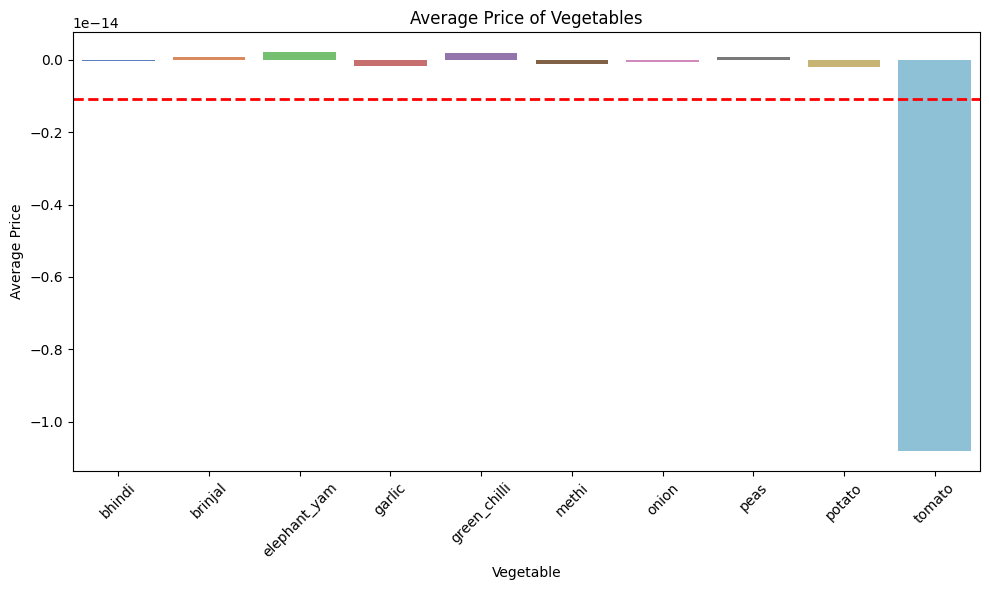

In [14]:
def plot_average_prices(df):
    """
    Plot the average price of vegetables from a DataFrame.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing vegetable prices.

    Returns:
    - None
    """
    # Melt the DataFrame to long format
    melted_df = pd.melt(df, value_vars=df.columns[1:11], var_name='vegetable', value_name='price')

    # Calculate the average price for each vegetable
    average_prices = melted_df.groupby('vegetable')['price'].mean().reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_prices, x='vegetable', y='price', hue='vegetable', palette='muted', legend=False)

    # Add dashed line for overall average price
    overall_mean = average_prices['price'].mean()
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Average')

    # Add title and labels
    plt.title('Average Price of Vegetables')
    plt.xlabel('Vegetable')
    plt.ylabel('Average Price')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot average prices:
plot_average_prices(df_copy)

### 1.3 Vegetable Price Distribution

- To visualize the distribution of numerical data in the DataFrame, we've implemented the plot_kde() function.
- This function takes a DataFrame containing numerical columns as input. It then generates Kernel Density Estimation (KDE) plots for each numerical column, providing insights into the data's distribution and central tendency. 
- The red dashed lines on each plot represent the mean value of the corresponding column, aiding in understanding the central tendency. 
- This visualization facilitates quick identification of skewness, outliers, and the overall shape of the distribution for each vegetable price, aiding in exploratory data analysis and hypothesis testing.


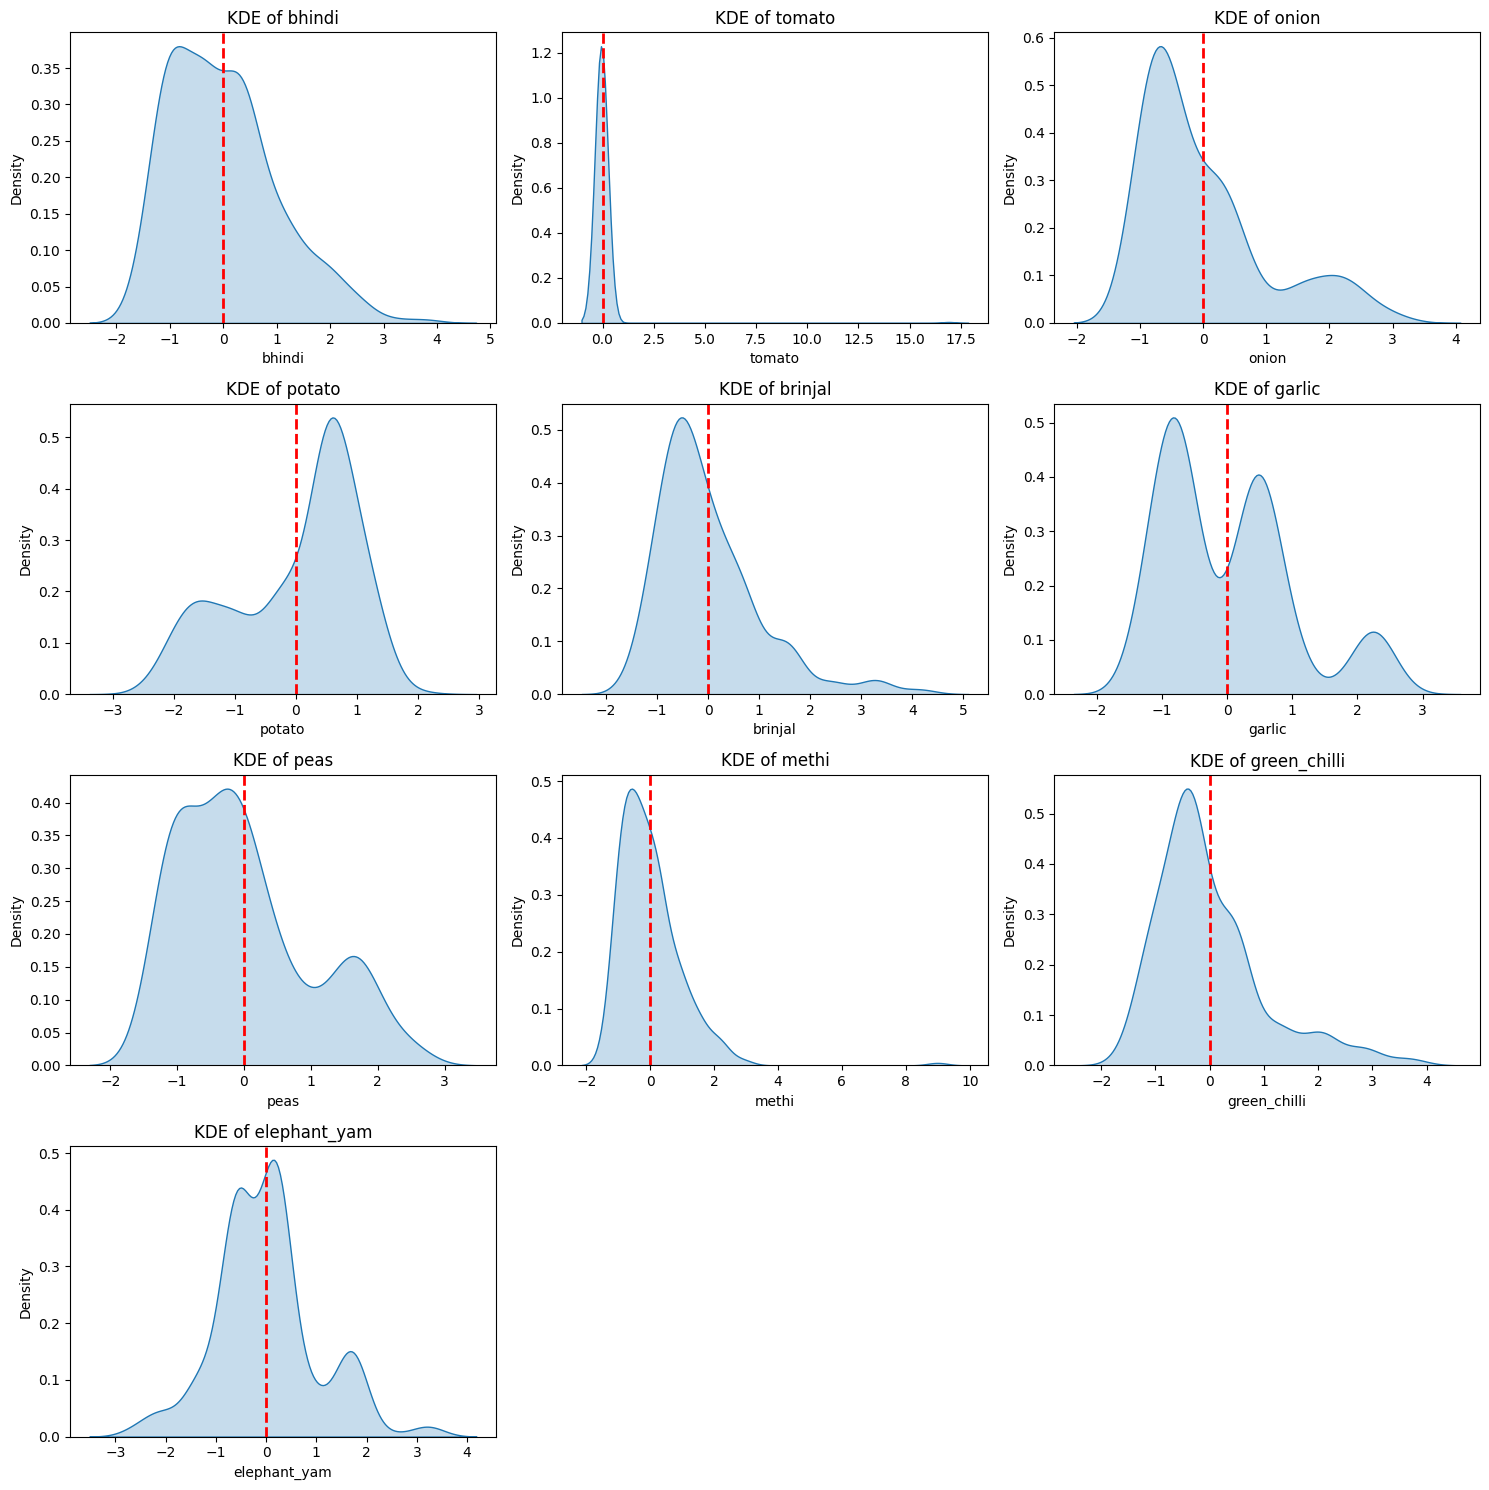

In [15]:
def plot_kde(df):
    """
    Plot Kernel Density Estimation (KDE) plots for numerical columns in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing numerical columns to be visualized.

    Returns:
    - None
    """
    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Setting up a 4x3 grid of plots
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Plotting a KDE for each column in its respective subplot
    for i, column in enumerate(df.columns[1:11]):  # Exclude the 'price_dates' and 'price_months' columns
        sns.kdeplot(df[column], fill=True, ax=axes[i])
        axes[i].set_title(f'KDE of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
        mean_val = df[column].mean()
        axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# KDE plots:
plot_kde(df_copy)

#### Results:

- Most of the KDE plots exhibit multimodal distributions, characterized by multiple peaks and wide ranges covering a relatively large span of prices. Notably, vegetables such as 'onion', 'potato', 'brinjal', 'garlic', 'peas', and 'elephant_yam' demonstrate this pattern. The presence of multiple peaks suggests the existence of distinct distributions or pricing patterns within the data, likely corresponding to different periods such as seasons or economic cycles. - This will be further investigated in the 'Multivariate Analysis' section below.
 
- Conversely, the KDE plots for 'tomato' and 'methi' showcase singular peaks and cover narrower ranges of values. 
- This indicates less variability in prices over time compared to other vegetables and suggests a more uniform distribution of prices or a predominant pricing trend observed consistently throughout the dataset.

- The average price of garlic, peas and green chilli appears to be higher than that of the average price of all other vegetables, while methi displays the lowest average price.

- This may be indicative of several factors, including demand-supply dynamics, seasonal variations, and production costs:
 
- Garlic, peas and green chilli are often considered high-demand vegetables with relatively limited growing seasons, which could contribute to their higher average prices.
- On the other hand, methi, being a leafy green vegetable, might have a lower production cost and a more extended growing season, resulting in its comparatively lower average price.
 
-Additionally, external factors such as weather conditions, transportation costs, and market fluctuations can also influence vegetable prices, contributing to the observed variations in average prices among different vegetables.


### 2. Multivariate Analysis

#### 2.1 Grouping Vegetables by Month

- The group_prices_by_month function serves to organize vegetable prices in a DataFrame based on the months specified in a particular column. 
- This functionality is particularly useful for analyzing seasonal variations in vegetable prices, allowing for a clearer understanding of how prices fluctuate over time. 
The function first selects columns containing float datatype values (representing vegetable prices) by . Then, it groups the vegetable prices by the specified month column and calculates the mean price per vegetable for each month. 
- This aggregated data provides insights into the average pricing trends across different vegetables over the course of each month, facilitating more informed decision-making and strategic planning.



In [16]:
def group_prices_by_month(df, month_column):
   
    # Select columns of float datatype (excluding 'price_dates')
    columns_to_group = df.select_dtypes(include='float64').columns
    
    # Group vegetable prices by the 'price_months' column, excluding 'price_dates' column, and calculate the mean
    grouped_prices_mean = df.groupby(month_column)[columns_to_group].mean()
    
    return grouped_prices_mean

# Example usage:
grouped_prices_mean = group_prices_by_month(df_copy, 'price_months')

#### 2.2 Visualizing KDE plot by month

- The plot_kde_by_month function creates visual representations of how vegetable prices are distributed each month. 
- It takes our data and makes a special kind of graph called a KDE plot for each vegetable. 
- These plots are arranged in a 4x3 grid, making it easy to compare different vegetables. 
- The function shows how the price distributions change from month to month, using different colors for each month. 
- It also marks the average price on each plot, helping us see typical prices at a glance. 
- This visual approach makes it simpler to spot patterns or changes in vegetable prices over time.


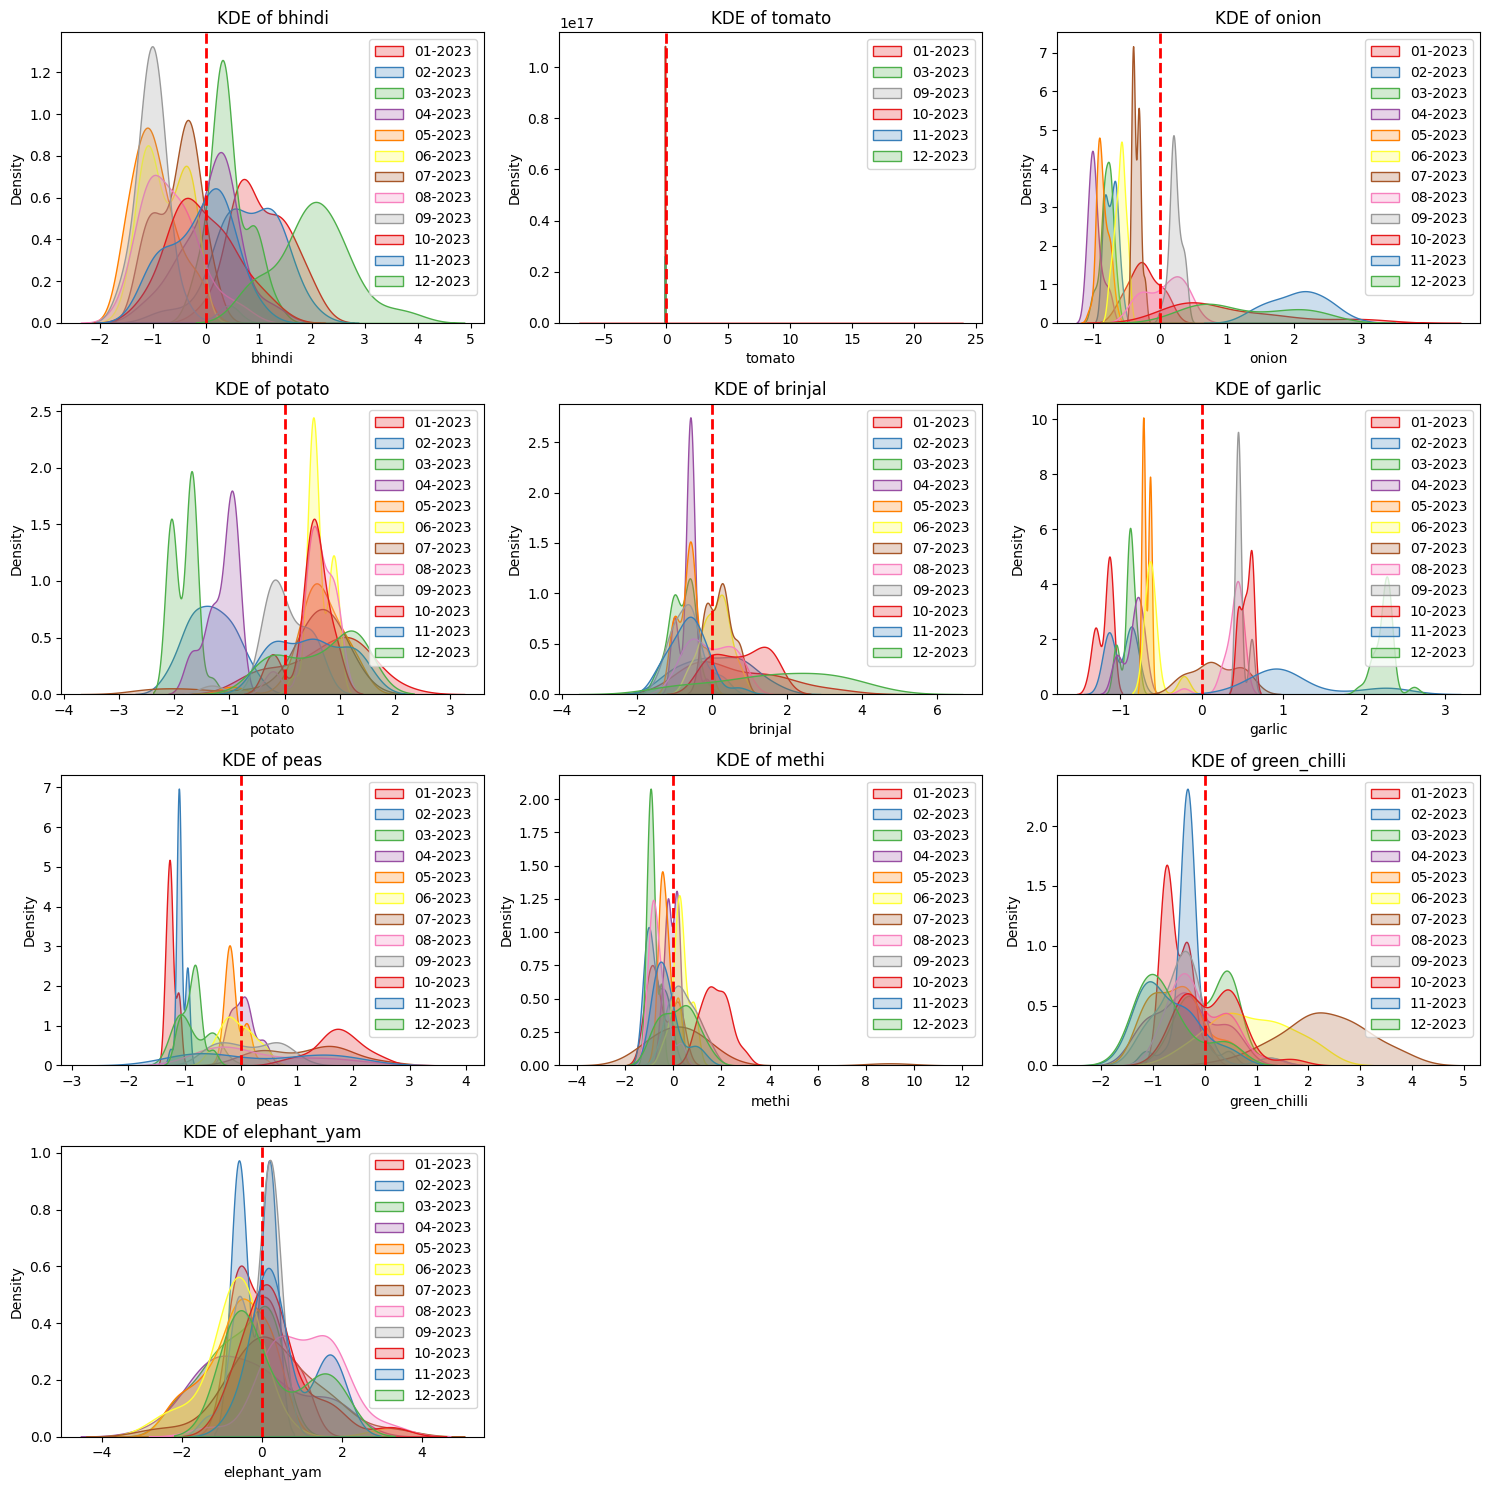

In [17]:
def plot_kde_by_month(df):
    
    # Remove non-numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])

    # Setting up a 4x3 grid of plots
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Define a custom color palette for months
    month_palette = sns.color_palette("Set1", n_colors=len(df['price_months'].unique()))

    # Plotting a KDE for each column in its respective subplot
    for i, column in enumerate(df.columns[1:11]):  # Exclude the 'price_dates' and 'price_months' columns
        for j, month in enumerate(df['price_months'].unique()):
            sns.kdeplot(df[df['price_months'] == month][column], fill=True, ax=axes[i], label=month, color=month_palette[j], warn_singular=False)
        axes[i].set_title(f'KDE of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
        mean_val = df[column].mean()
        axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
        axes[i].legend()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# KDE plots with separate distributions by 'price_months' and legends using a custom color scheme:
plot_kde_by_month(df_copy)

#### Results:
 
- Across the majority of vegetables, the KDE plots exhibit a singular peak, indicating that seasonality likely plays a significant role in influencing vegetable prices. This observation aligns with expectations, as certain vegetables may become more or less abundant and consequently more or less expensive depending on the season.


- However, it's notable that some distributions still display multiple peaks, suggesting that seasonality alone does not entirely explain all of the variation in vegetable prices. -
- Other factors such as market dynamics, supply chain disruptions, and economic conditions could contribute to these additional peaks. 
- Therefore, while seasonality is a key factor influencing vegetable prices, it's important to consider a range of factors to fully understand the complexities of price variation.
- It is worth noting that for the 'tomato' vegetable, only the distribution of '01-2023' could be produced. 


- This is due to the lack of variance in subsequent months, resulting in skipped density estimates.
- This limited variation suggests that tomato prices were relatively stable during the observed period, particularly after January 2023. 
- Such stability may indicate consistent supply levels, market conditions, or other factors contributing to market equilibrium.


### 2.3  Visualizing Mean Prices Over Time for Each Vegetable


- The plot_mean_prices_line_chart function is utilized to visualize the mean prices for each month for each vegetable in the dataset. 
- This function generates a 5x2 grid of subplots, with each subplot representing the mean price trends of a specific vegetable over the months. 
- The x-axis of each subplot represents the months, while the y-axis represents the corresponding mean price values. 
- This visualization allows for easy comparison of the mean price trends over time for different vegetables.


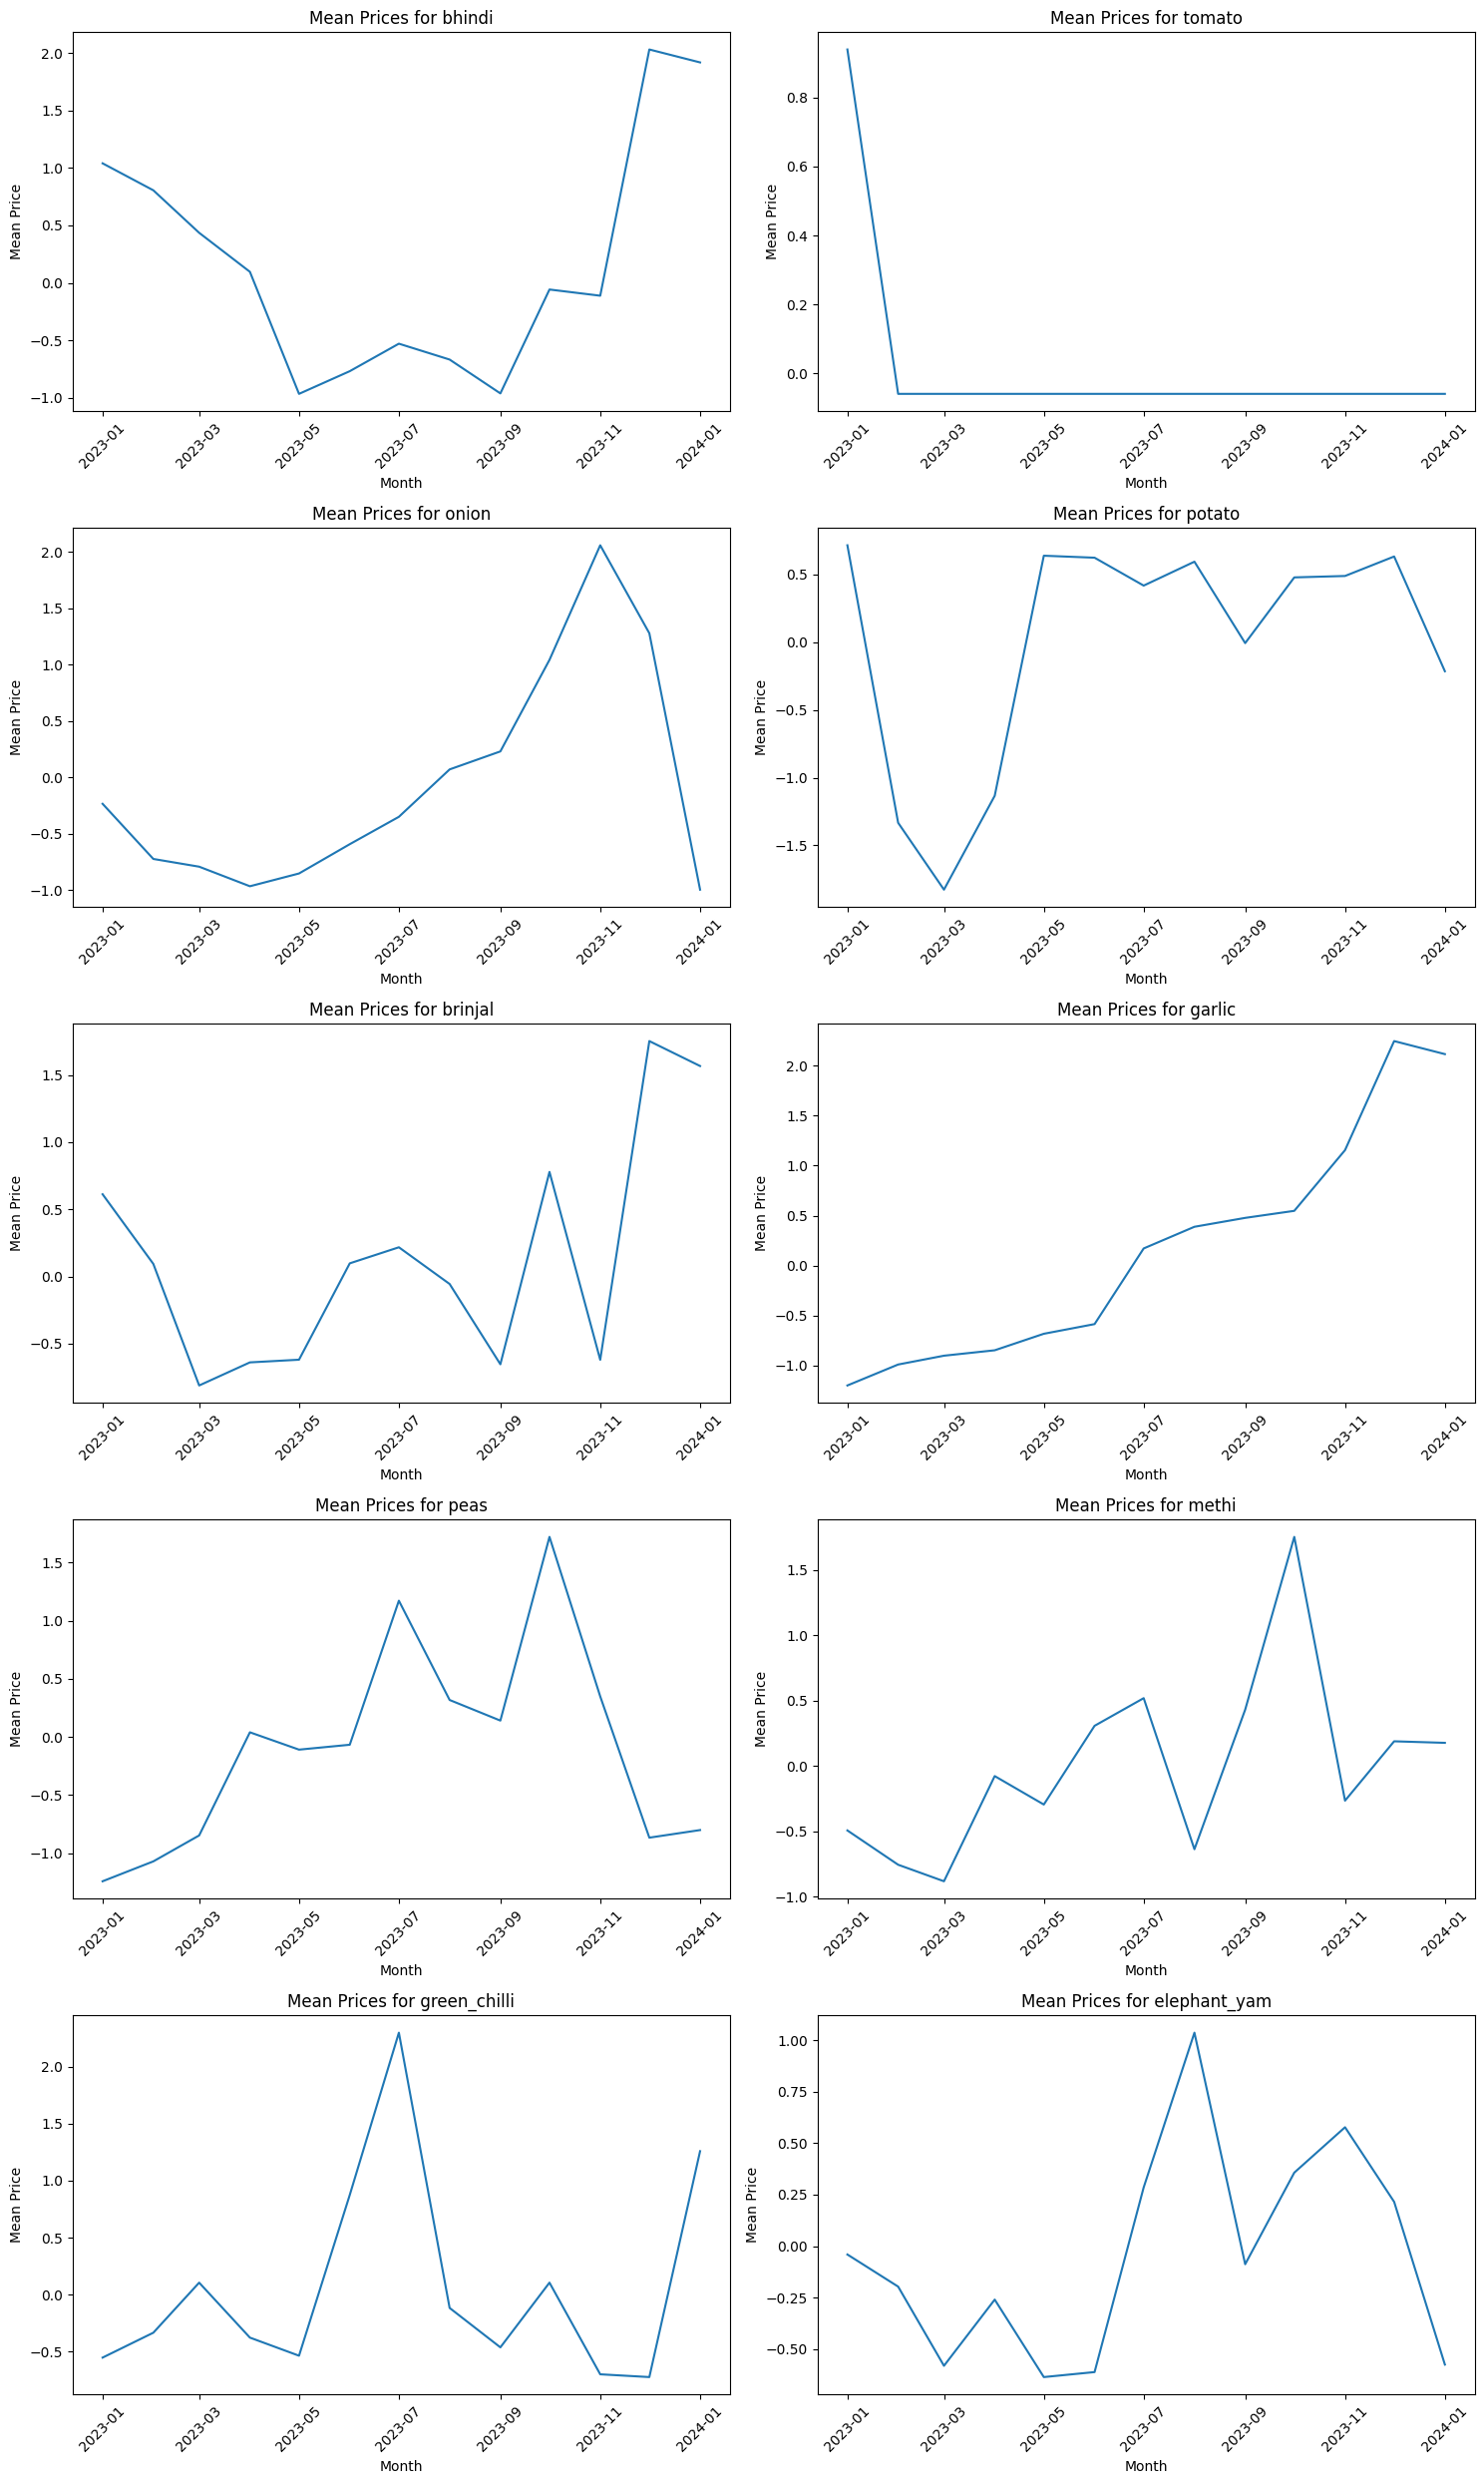

In [18]:
def plot_mean_prices_line_chart(grouped_prices_mean):
    
    # Ensure the index is a datetime index
    grouped_prices_mean.index = pd.to_datetime(grouped_prices_mean.index, format='%m-%Y')
    
    # Sort the DataFrame by the index (year, then month)
    grouped_prices_mean = grouped_prices_mean.sort_index()
    
    # Calculate the number of subplots needed
    num_plots = len(grouped_prices_mean.columns)
    num_rows = int(np.ceil(num_plots / 2))  # Calculate number of rows required
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
    
    # Plot each vegetable in a separate subplot
    for i, column in enumerate(grouped_prices_mean.columns):
        ax = axes[i]
        ax.plot(grouped_prices_mean.index, grouped_prices_mean[column], label=column)
        ax.set_title(f'Mean Prices for {column}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Mean Price')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    plt.tight_layout()
    plt.show()

plot_mean_prices_line_chart(grouped_prices_mean)

#### Results:

- Bhindi: Prices decrease Jan-May, increase Sep-Dec. Aligns with seasonal availability.
- Tomato: Stable prices at 16.00 Rs, suggesting consistent supply/demand.
- Onion: Prices increase Apr-Nov, peak in Nov, then drop. Matches known seasonal pattern.
- Potato: Lower prices Feb-Mar, then rise and remain high. Reflects cultivation cycle.
- Brinjal: Lowest Mar-May, peaks in Jul, Oct, Dec. Shows seasonal variation.
- Garlic: Clear upward trend throughout the period.
- Peas: Upward trend Jan-Oct with peaks in Apr, Jul, Oct. Sharp drop after Oct.
- Methi: Seasonal peaks in Mar, Jun, Oct, increasing in magnitude.
- Green Chilli: Massive price peak in July.
- Elephant Yam: Highest in Aug, brief drop, then rise Oct-Dec. Linked to harvest seasons.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [19]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [20]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [21]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [22]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [23]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
